#Pythonで学ぶ画像認識　第2章 画像処理の基礎知識
## 第2.2節 画像に平滑化フィルタをかけてみよう

### モジュールのインポートとGoogleドライブのマウント

In [1]:
from PIL import Image
import numpy as np

# Googleドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###ガウシアンカーネルの生成関数

In [2]:
'''
kernel_width : 生成するカーネルの幅
kernel_height: 生成するカーネルの高さ
sigma        : カーネルの値を決めるガウス分布の標準偏差
'''
def generate_gaussian_kernel(
        kernel_width: int, kernel_height: int, sigma: float):
    # カーネルの大きさを奇数に限定に限定
    assert kernel_width % 2 == 1 and kernel_height % 2 == 1

    # カーネル用の変数を用意
    kernel = np.empty((kernel_height, kernel_width))

    for y in range(-(kernel_height // 2), kernel_height // 2 + 1):
        for x in range(-(kernel_width // 2), kernel_width // 2 + 1):
            # ガウス分布から値を抽出しカーネルに代入
            h = -(x ** 2 + y  ** 2) / (2 * sigma ** 2)
            h = np.exp(h) / (2 * np.pi * sigma ** 2)
            kernel[y + kernel_height // 2, x + kernel_width // 2] = h

    # カーネルの和が1になるように正規化
    kernel /= np.sum(kernel)

    return kernel

###畳み込み演算を行う関数

In [3]:
'''
img   : 畳み込み演算を適用する画像
kernel: 平滑化フィルタのカーネル, [カーネル高さ、カーネル幅]
x     : カーネルの中心となる画像上のx座標
y     : カーネルの中心となる画像上のy座標
'''
def convolution(img: Image.Image, kernel: np.ndarray, x: int, y: int):
    # 画像サイズとカーネルサイズの取得
    width, height = img.size
    kernel_height, kernel_width = kernel.shape[:2]

    # 畳み込み演算
    value = 0
    for y_kernel in range(-(kernel_height // 2),
                          kernel_height // 2 + 1):
        for x_kernel in range(-(kernel_width // 2),
                              kernel_width // 2 + 1):
            # カーネルが画像からはみ出る場合、端の座標を取得
            x_img = max(min(x + x_kernel, width - 1), 0)
            y_img = max(min(y + y_kernel, height - 1), 0)
            h = kernel[y_kernel + kernel_height // 2,
                       x_kernel + kernel_width // 2]
            value += h * img.getpixel((x_img, y_img))

    return value

###画像にカーネルを適用する関数

In [4]:
'''
img   : 平滑化フィルタを適用する画像
kernel: 平滑化フィルタのカーネル, [カーネル高さ、カーネル幅]
'''
def apply_filter(img: Image.Image, kernel: np.ndarray):
    # 画像サイズとカーネルサイズの取得
    width, height = img.size

    # フィルタ適用後の画像を保持する変数を用意
    img_filtered = Image.new(mode='L', size=(width, height))

    # フィルタ適用後の各画素値の計算
    for y in range(height):
        for x in range(width):
            filtered_value = convolution(img, kernel, x, y)
            img_filtered.putpixel((x, y), int(filtered_value))

    return img_filtered

###カーネルの生成

In [5]:
# ガウシアンカーネルの生成
kernel = generate_gaussian_kernel(
    kernel_width=5, kernel_height=5, sigma=1.3)

# カーネルの表示
print('ガウシアンカーネル:')
print(kernel)

ガウシアンカーネル:
[[0.0097565  0.02370077 0.03186045 0.02370077 0.0097565 ]
 [0.02370077 0.0575746  0.07739634 0.0575746  0.02370077]
 [0.03186045 0.07739634 0.10404229 0.07739634 0.03186045]
 [0.02370077 0.0575746  0.07739634 0.0575746  0.02370077]
 [0.0097565  0.02370077 0.03186045 0.02370077 0.0097565 ]]


###ガウシアンフィルタの適用

元のノイズ画像


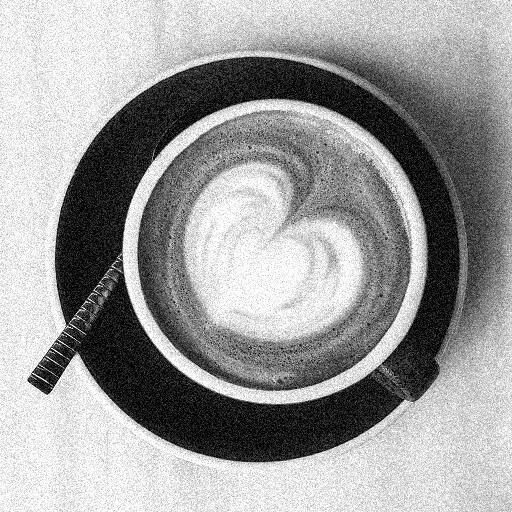

フィルタ適用後の画像


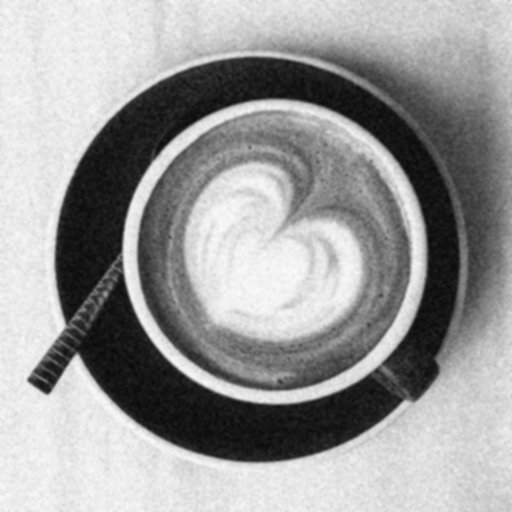

In [6]:
# 画像の読み込み
img = Image.open('drive/MyDrive/python_image_recognition/data/coffee_noise.jpg')

# ガウシアンフィルタの適用
img_filtered = apply_filter(img, kernel)

# 元画像とフィルタ適用後の画像の表示
print('元のノイズ画像')
display(img)
print('フィルタ適用後の画像')
display(img_filtered)